# **Restaurant Data Analysis**

**Importing the required libraries to perform each Task for each level**

In [1]:
# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# **Level 1**

## **Task 1: Data Exploration and Preprocessing**

**1.** `Explore the dataset and identify the number of rows and columns.`

**2.** `Check for missing values in each column and handle them accordingly.`

**3.** `Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.`

###**1.1.1. Explore the dataset and identify the number of rows and columns.**

In [2]:
# loading the dataset

df = pd.read_csv('/content/Dataset .csv')

In [3]:
# displaying Top 5 rows of the dataset

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# displaying Bottom 5 rows of the dataset

df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
# information of the data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Identifying the number of Rows and Columns

num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 9551
Number of Columns: 21


###**1.1.2. Check for missing values in each column and handle them accordingly.**

**Checking the missing values**

In [7]:
# checking the missing values in each column

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

* **H**ere we can see, Except **Cuisines** Column there is no any missing value present in our dataset.

* **Cuisines** Column has **9** missing values.

In [8]:
# Null Values in Cuisines column

print(f"Missing values in Cuisines column: {df.Cuisines.isnull().sum()}")

Missing values in Cuisines column: 9


In [9]:
# Creating a new DataFrame containing all rows where 'Cuisines' is null, with selected columns

df_216 = df[df['Cuisines'].isnull()].loc[:, ['Restaurant ID', 'City', 'Country Code', 'Cuisines']]
df_216

,Restaurant ID,City,Country Code,Cuisines
84,17284105,Albany,216,NaN
87,17284211,Albany,216,NaN
94,17284158,Albany,216,NaN
297,17374552,Gainesville,216,NaN
328,17501439,Macon,216,NaN
346,17606621,Miller,216,NaN
368,17059060,Orlando,216,NaN
418,17142698,Rest of Hawaii,216,NaN
455,17616465,Savannah,216,NaN


* **H**ere we can see, All Null values for **Cuisines** Column are coming from **Country code - 216**, where each Restaurant is unique (9), and total unique **City** is **7**
* index where Null is present **[84, 87, 94, 297, 328, 346, 368, 418, 455]**

**Handling and Imputing the missing values in Cuisines column**

In [10]:
# mode of Cuisine for country code = 216 to Impute

mcuisine_216 = df[df['Country Code'] == 216]['Cuisines'].mode().iloc[0]
print(f"Most frequent Cuisine for Country Code 216 is: {mcuisine_216}")

Most frequent Cuisine for Country Code 216 is: Mexican


In [11]:
# mode of Cuisine for each City to Impute

null_indexes = [84, 87, 94, 297, 328, 346, 368, 418, 455]

for index in null_indexes:
    city = df.at[index, 'City']
    cuisines_mode = df[df['City'] == city]['Cuisines'].mode().values

    # filling the Null values
    if len(cuisines_mode) > 0:
        df.at[index, 'Cuisines'] = cuisines_mode[0]
    else:
        df.at[index, 'Cuisines'] = mcuisine_216

print("Cuisines Values After Imputation:\n")
print(df.loc[null_indexes, 'Cuisines'])

Cuisines Values After Imputation:

84       Japanese, Steak, Sushi
87       Japanese, Steak, Sushi
94       Japanese, Steak, Sushi
297          American, Southern
328       Japanese, Sushi, Thai
346                     Mexican
368                    American
418    Hawaiian, Seafood, Steak
455         American, Breakfast
Name: Cuisines, dtype: object


###**1.1.3. Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.**

**Perform data type conversion if necessary**

In [12]:
# checking the datatype of all columns

df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

* **I**n dataset some column contains **Yes** and **No** values, We can convert these values into **1** and **0** respectively.

* Here's the column names-
  * Has Table booking
  * Has Online delivery
  * Is delivering now
  * Switch to order menu

In [13]:
# converting Yes into 1 and No into 0

new_values = {"Yes":1, "No":0}
columns_to_convert = ["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]

# converting the datatype using replace function
df[columns_to_convert] = df[columns_to_convert].replace(new_values)

In [14]:
# columns data types after conversion

df[columns_to_convert].dtypes

Has Table booking       int64
Has Online delivery     int64
Is delivering now       int64
Switch to order menu    int64
dtype: object

**Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.**

In [15]:
# statistical Analysis of target variable

summary_stats = df['Aggregate rating'].describe()
print(summary_stats)

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


In [16]:
# frequency of each Aggregate rating

class_frequencies = df['Aggregate rating'].value_counts()
print(class_frequencies)

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


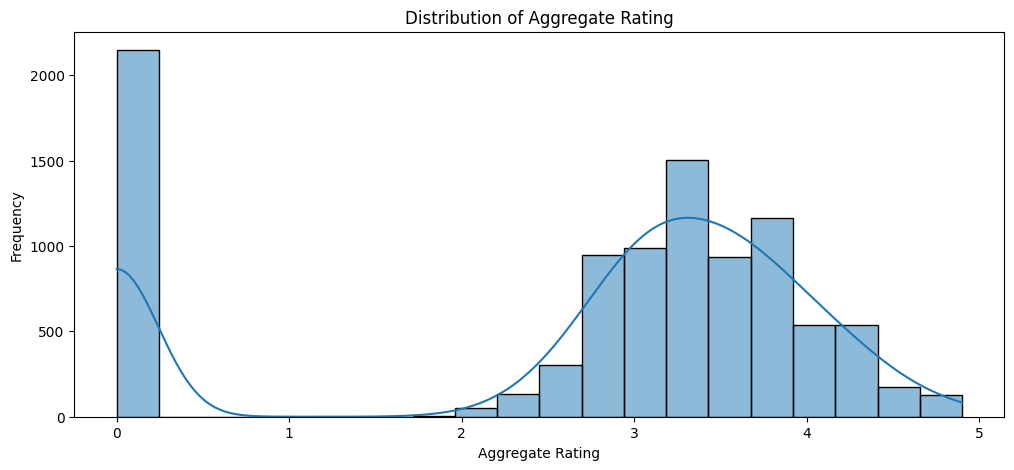

In [17]:
# Analyzing the distribution of the target variable

plt.figure(figsize=(12, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

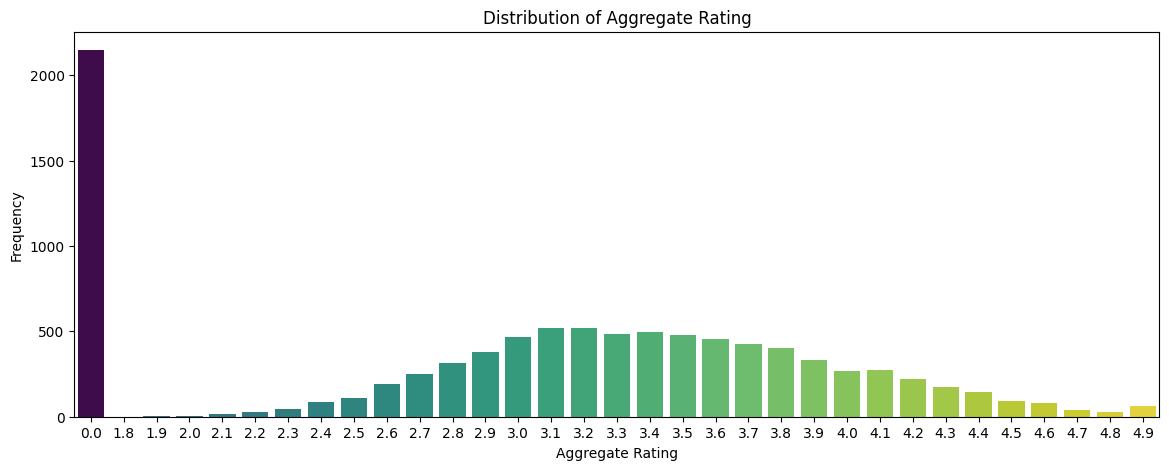

In [18]:
# Analyzing the distribution of the target variable using countplot

plt.figure(figsize=(14, 5))
sns.countplot(x='Aggregate rating', data=df, hue='Aggregate rating', palette='viridis', legend=False)
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

**Here are some general observations:**

* **Most common rating is 0.0:** Indicates many restaurants have no or very low ratings (2148 instances).

* **Mid-range ratings are popular:** Ratings between 3.0 and 4.0 are common.

* **Few instances of extreme ratings:** Very low (e.g., "1.8")  ratings are less frequent.

* **No even distribution:** Some ratings have more instances than others.

* **Overall balanced distribution:** Ratings are generally balanced, with varied opinions.

## **Task 2:  Descriptive Analysis**

**1.** `Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.`

**2.** `Explore the distribution of categorical variables like "Country Code",  "City" and "Cuisines"`

**3.** `Identify the top cuisines and cities with the highest number of restaurants.`

###**1.2.1. Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.**

In [19]:
# calculating basic statistical measures for numerical columns

print("Basic Statistical Measures for Numerical Columns:\n")
df.describe()

Basic Statistical Measures for Numerical Columns:



,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,10934.000000


###**1.2.2. Explore the distribution of categorical variables like "Country Code", "City" and "Cuisines"**

In [20]:
# exploring the distribution of "Country Code"
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

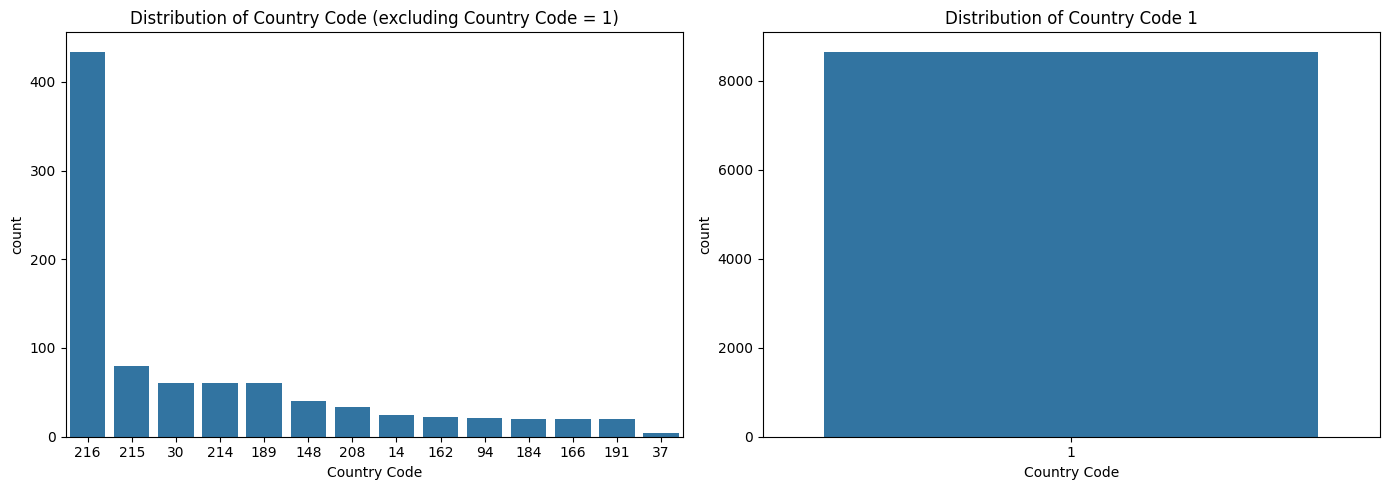

In [21]:
# visualizing the distribution of "Country Code"

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Country Code', data=df, order=df['Country Code'].value_counts().iloc[1:].index)
plt.title('Distribution of Country Code (excluding Country Code = 1)')

plt.subplot(1, 2, 2)
sns.countplot(x='Country Code', data=df, order=df['Country Code'].value_counts().iloc[:1].index)
plt.title('Distribution of Country Code 1')

plt.tight_layout()
plt.show()


In [22]:
# exploring the distribution of "City"
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

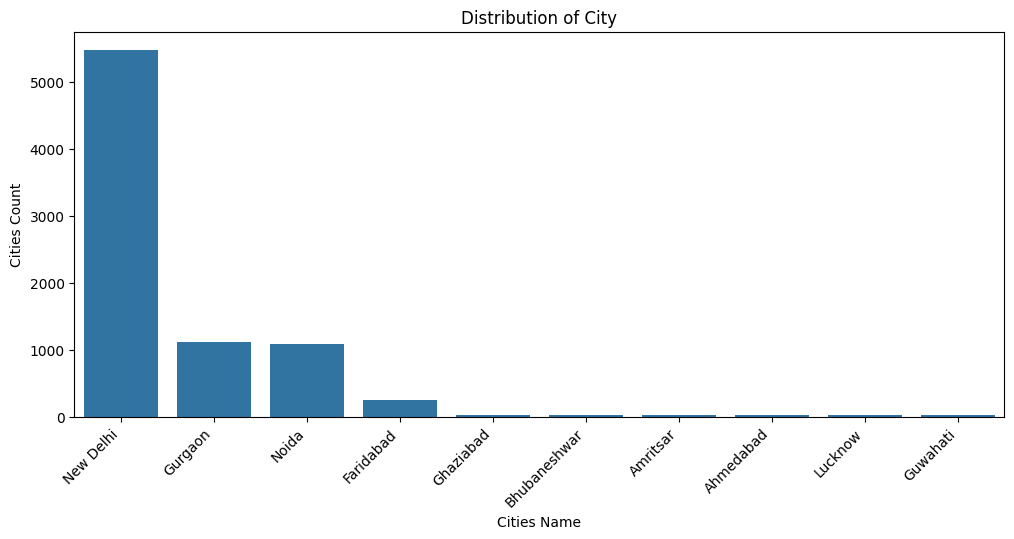

In [23]:
# visualizing the distribution of "City"

plt.figure(figsize=(12, 5))
sns.countplot(x='City', data=df, order=df['City'].value_counts().head(10).index)
plt.title('Distribution of City')
plt.xlabel('Cities Name')
plt.ylabel('Cities Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# exploring the distribution of "Cuisines"
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

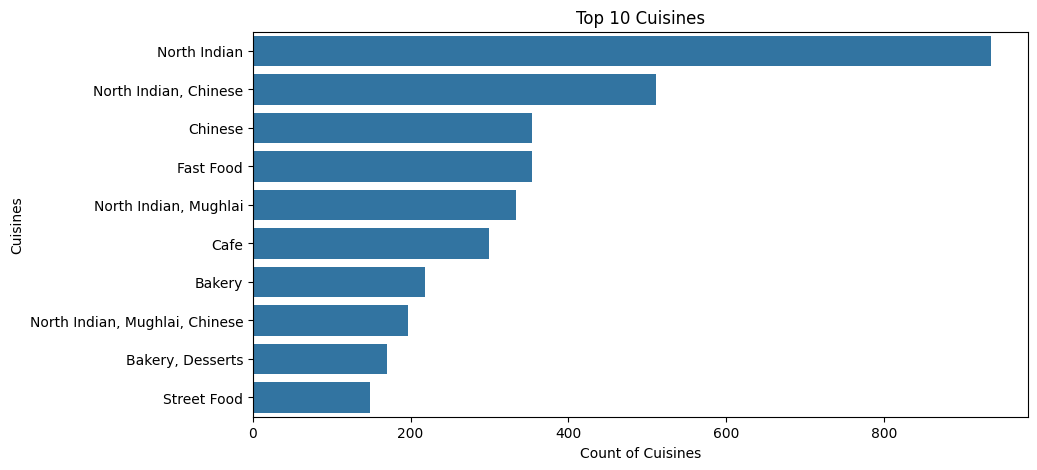

In [25]:
# visualizing the top 10 cuisines

top_cuisines = df['Cuisines'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines')
plt.xlabel('Count of Cuisines')
plt.ylabel('Cuisines')
plt.show()

###**1.2.3. Identify the top cuisines and cities with the highest number of restaurants.**

In [26]:
# top cuisines with the highest number of restaurants

top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top Cuisines with the highest number of restaurants:\n")
print(top_cuisines)

Top Cuisines with the highest number of restaurants:

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


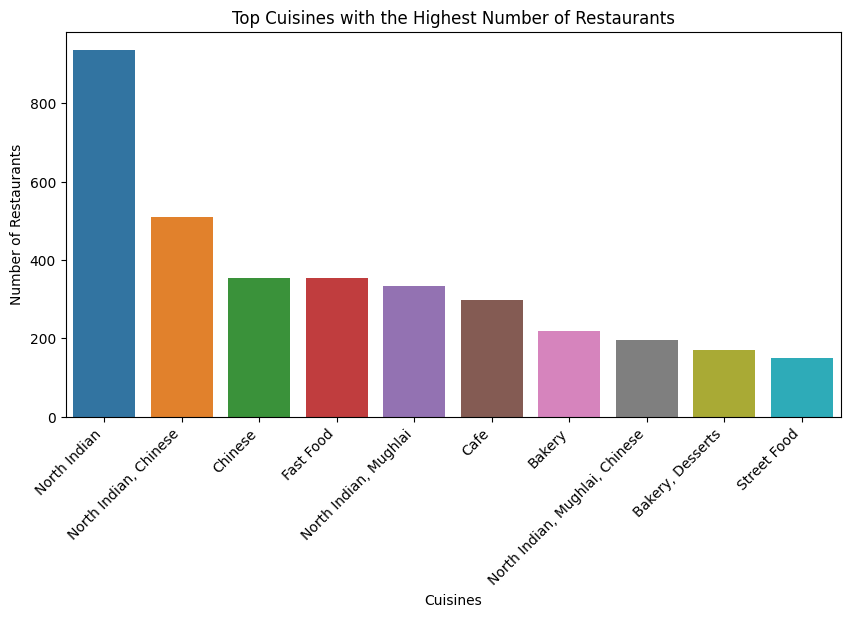

In [27]:
# visualizing the top Cuisines with the highest number of restaurants

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, hue=top_cuisines.index)
plt.title('Top Cuisines with the Highest Number of Restaurants')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# top cities with the highest number of restaurants

top_cities = df['City'].value_counts().head(7)
print("Top Cities with the Highest Number of Restaurants:")
print(top_cities)

Top Cities with the Highest Number of Restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Name: City, dtype: int64


* ` It shows that New Delhi has the highest number of restaurants (5473), followed by Gurgaon (1118) and Noida (1080), with Faridabad having fewer restaurants (251).`
* `Also Ghaziabad, Bhubaneshwar, Amritsar followed by remaining cities, having relatively fewer establishments respectively.`

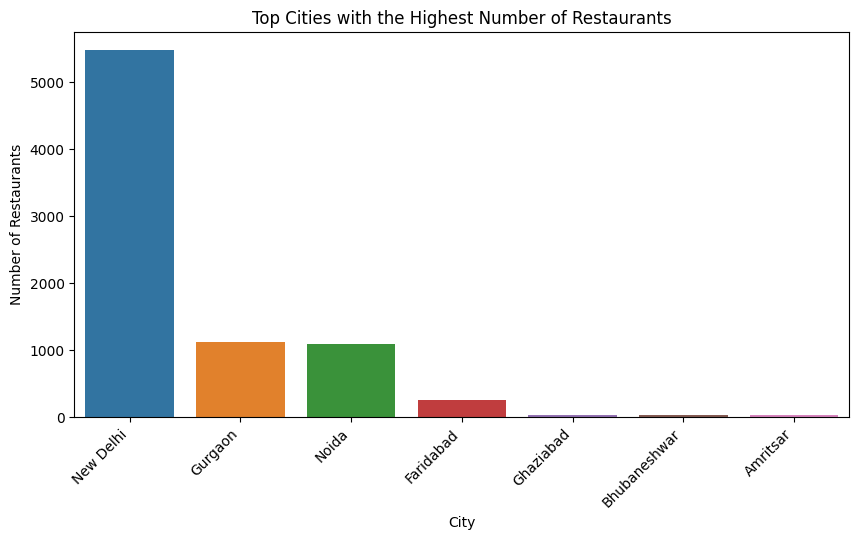

In [29]:
# visualizing the top cities with the highest number of restaurants

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index)
plt.title('Top Cities with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Task 3: Geospatial Analysis**

**1.** `Visualize the locations of restaurants on a map using latitude and longitude information.`

**2.** `Analyze the distribution of restaurants across different cities or countries.`

**3.** `Determine if there is any correlation between the restaurant's location and its rating.`

###**1.3.1. Visualize the locations of restaurants on a map using latitude and longitude information.**

In [30]:
# visualizing the locations of restaurants on a map

fig = px.scatter_mapbox(df, lat ="Latitude", lon="Longitude", hover_name="Restaurant Name", hover_data=["City", "Cuisines"], zoom=10)
fig.update_layout(mapbox_style ="open-street-map")
fig.update_layout(margin=dict(r=0, t=0, l=0, b=0))
fig.show()

###**1.3.2. Analyze the distribution of restaurants across different cities or countries.**

In [31]:
# distribution of restaurants across cities and countries

city_country_distribution = df.groupby(['City', 'Country Code']).size().reset_index(name='Number of Restaurants')
top_cities = city_country_distribution.groupby('City').size().nlargest(10).reset_index(name='Number of Restaurants')
top_countries = city_country_distribution.groupby('Country Code').size().nlargest(10).reset_index(name='Number of Restaurants')

# summary statistics for top cities
print("Top Cities with the Highest Number of Restaurants:\n")
print(top_cities)

# summary statistics for top countries
print(f"\n{'*'*55}\n\nTop Countries with the Highest Number of Restaurants:\n")
print(top_countries)

Top Cities with the Highest Number of Restaurants:

        City  Number of Restaurants
0  Abu Dhabi                      1
1       Agra                      1
2  Ahmedabad                      1
3     Albany                      1
4  Allahabad                      1
5   Amritsar                      1
6     Ankara                      1
7   Armidale                      1
8     Athens                      1
9   Auckland                      1

*******************************************************

Top Countries with the Highest Number of Restaurants:

   Country Code  Number of Restaurants
0             1                     43
1           216                     35
2            14                     23
3           162                      9
4           189                      6
5            37                      4
6            94                      4
7           215                      4
8            30                      3
9           214                      3


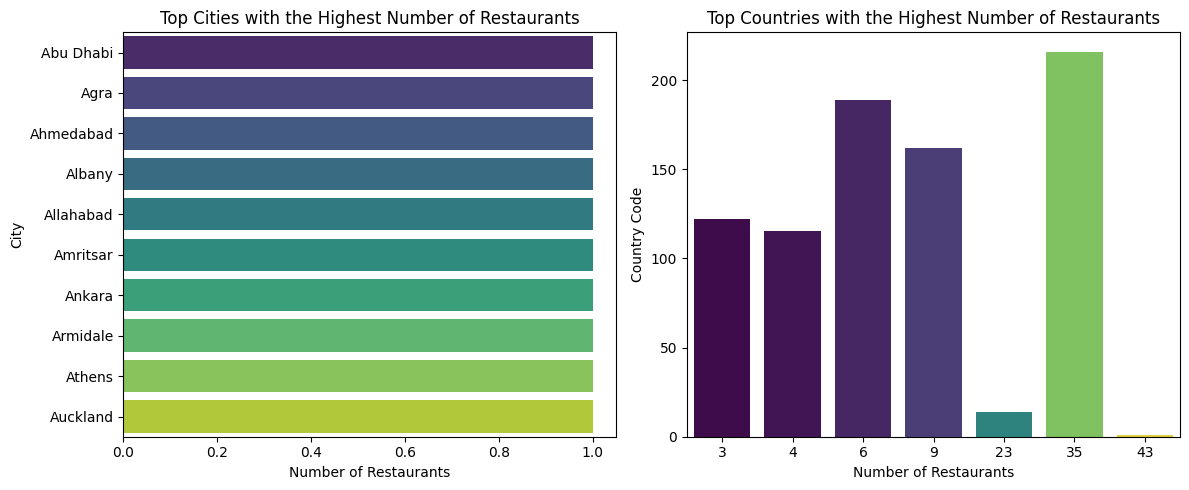

In [85]:
# visualizing the distribution of Restaurants across cities and countries
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Restaurants across cities
sns.barplot(x='Number of Restaurants', y='City', data=top_cities, ax=axes[0], hue='City', palette='viridis', legend=False)
axes[0].set_title('Top Cities with the Highest Number of Restaurants')
axes[0].set_xlabel('Number of Restaurants')
axes[0].set_ylabel('City')

# Restaurants across cities
sns.barplot(x='Number of Restaurants', y='Country Code', data=top_countries, ax=axes[1], hue='Number of Restaurants', palette='viridis', dodge=False, errorbar=None, legend=False)
axes[1].set_title('Top Countries with the Highest Number of Restaurants')
axes[1].set_xlabel('Number of Restaurants')
axes[1].set_ylabel('Country Code')

plt.tight_layout()
plt.show()

###**1.3.3. Determine if there is any correlation between the restaurant's location and its rating.**

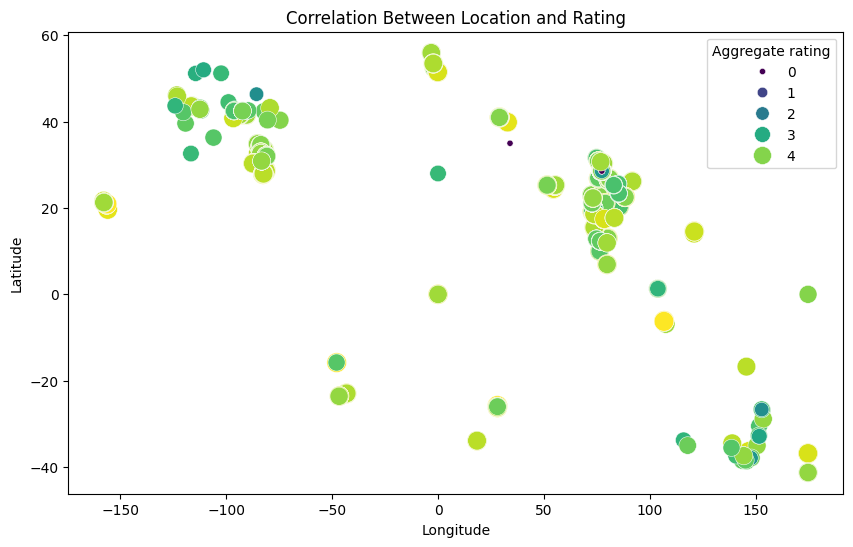

In [33]:
# determining the correlation between the restaurant's location and its rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='viridis', size='Aggregate rating', sizes=(20, 200))
plt.title('Correlation Between Location and Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

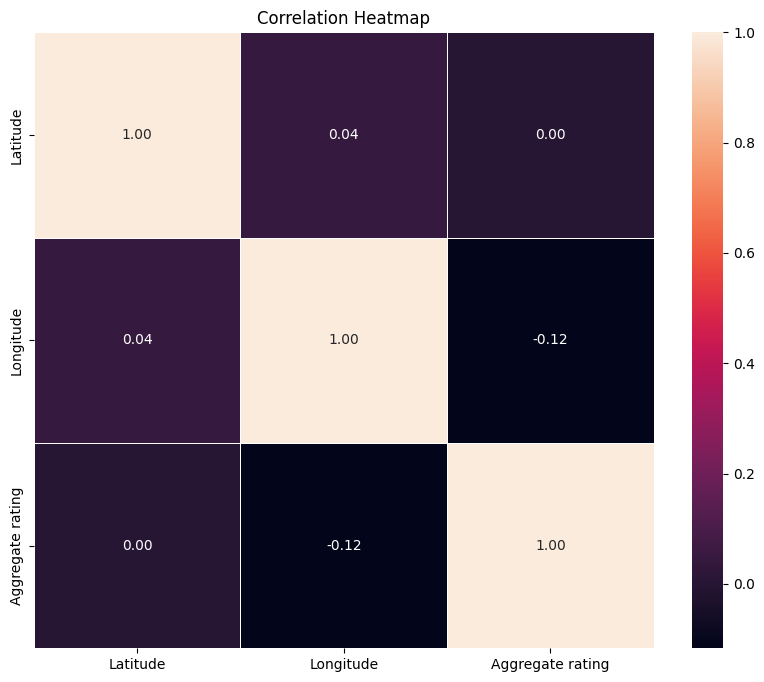

In [34]:
# determining the correlation between the restaurant's location and its rating (Heatmap)

plt.figure(figsize=(10, 8))
heatmap_data = df[['Latitude', 'Longitude', 'Aggregate rating']]
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Level 2**

## **Task 1: Table Booking and Online Delivery**

**1.** `Determine the percentage of restaurants that offer table booking and online delivery.`

**2.** `Compare the average ratings of restaurants with table booking and those without.`

**3.** `Analyze the availability of online delivery among restaurants with different price ranges.`

###**2.1.1. Determine the percentage of restaurants that offer table booking and online delivery.**

In [35]:
# calculating the percentage of restaurants for table booking
table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
print(f"Percentage of restaurants for table booking:\nYes: {table_booking_percentage[1]}\n No: {table_booking_percentage[0]}\n")

# calculating the percentage of restaurants for online delivery
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print(f"Percentage of restaurants for online delivery:\nYes: {online_delivery_percentage[1]}\n No: {online_delivery_percentage[0]}\n")

# printing the results
print(f"Percentage of restaurants that offers table booking: {table_booking_percentage.loc[1]}%")
print(f"Percentage of restaurants that offers online delivery: {online_delivery_percentage.loc[1]}%")

Percentage of restaurants for table booking:
Yes: 12.12
 No: 87.88

Percentage of restaurants for online delivery:
Yes: 25.66
 No: 74.34

Percentage of restaurants that offers table booking: 12.12%
Percentage of restaurants that offers online delivery: 25.66%


###**2.1.2. Compare the average ratings of restaurants with table booking and those without.**

In [36]:
# comparing the average ratings of restaurants with table booking and those without

average_rating_with_table_booking = df[df['Has Table booking'] == 1]['Aggregate rating'].mean()
average_rating_without_table_booking = df[df['Has Table booking'] == 0]['Aggregate rating'].mean()

print("Average Rating with Table Booking:", average_rating_with_table_booking.round(2))
print("Average Rating without Table Booking:", average_rating_without_table_booking.round(2))


Average Rating with Table Booking: 3.44
Average Rating without Table Booking: 2.56


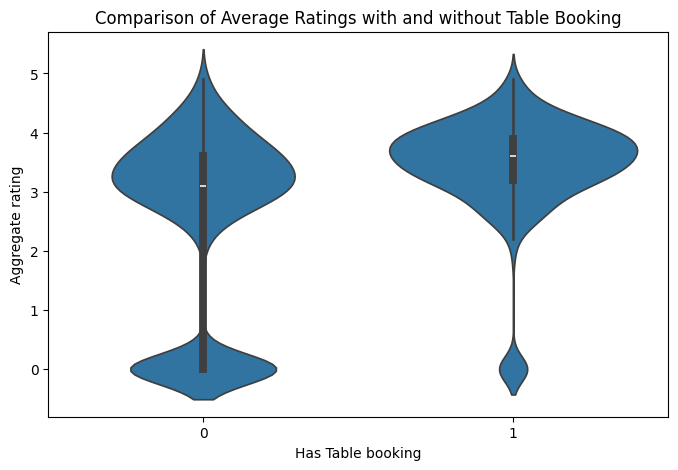

In [37]:
# visualizing the Comparison of Average Ratings with and without Table Booking.

plt.figure(figsize=(8, 5))
sns.violinplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Comparison of Average Ratings with and without Table Booking')
plt.show()

###**2.1.3. Analyze the availability of online delivery among restaurants with different price ranges.**

In [38]:
# analyzing the availability of online delivery among restaurants with different price ranges

price_range_online_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print("Availability of Online Delivery Among Restaurants with Different Price Ranges:")
print(price_range_online_delivery)

Availability of Online Delivery Among Restaurants with Different Price Ranges:
Has Online delivery          0          1
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


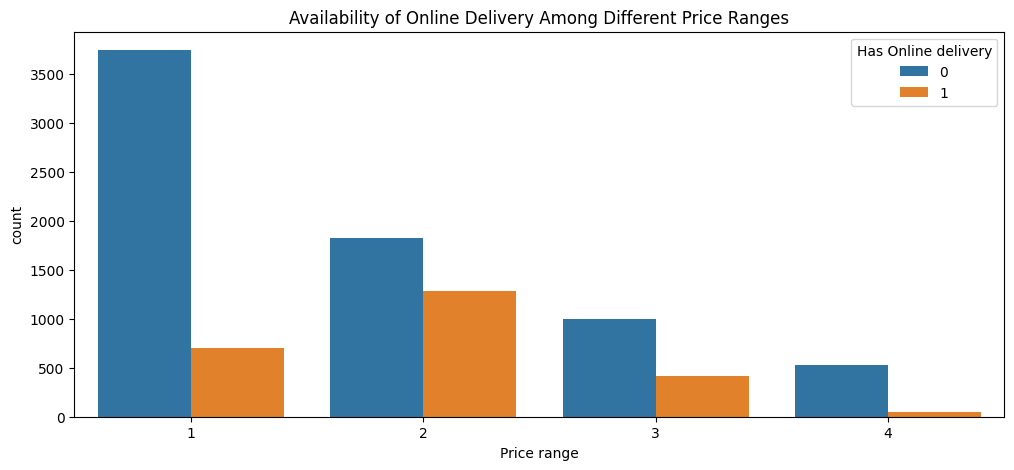

In [39]:
# visualizing the availability of online delivery among different price ranges

plt.figure(figsize=(12, 5))
sns.countplot(x='Price range', hue='Has Online delivery', data=df)
plt.title('Availability of Online Delivery Among Different Price Ranges')
plt.show()

## **Task 2:  Price Range Analysis**

**1.** `Determine the most common price range among all the restaurants.`

**2.** `Calculate the average rating for each price range.`

**3.** `Identify the color that represents the highest average rating among different price ranges.`

###**2.2.1. Determine the most common price range among all the restaurants.**

In [40]:
# determining the most common price range among all the restaurants

most_common_price_range = df['Price range'].mode().iloc[0]
print("Most Common Price Range:", most_common_price_range)

Most Common Price Range: 1


###**2.2.2. Calculate the average rating for each price range.**

In [41]:
# calculating the average rating for each price range

average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Rating for Each Price Range:\n", average_rating_by_price_range)

Average Rating for Each Price Range:
 Price range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: Aggregate rating, dtype: float64


###**2.2.3. Identify the color that represents the highest average rating among different price ranges.**

In [42]:
# identifying the color that represents the highest average rating among different price ranges

highest_rated_price_range = average_rating_by_price_range.idxmax()
highest_rated_color = df[df['Price range'] == highest_rated_price_range]['Rating color'].iloc[0]
print("Price Range with the Highest Average Rating:", highest_rated_price_range)
print("Color Representing the Highest Average Rating:", highest_rated_color)

Price Range with the Highest Average Rating: 4
Color Representing the Highest Average Rating: Green


## **Task 3: Feature Engineering**

**1.** `Extract additional features from the existing columns, such as the length of the restaurant name or address.`

**2.** `Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.`

###**2.3.1. Extract additional features from the existing columns, such as the length of the restaurant name or address.**

In [43]:
# extracting additional features. For example, extracting the length of the restaurant name and address

df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

print("Example of Extracted Features:")
df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head()

Example of Extracted Features:


,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


###**2.3.2. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.**

**T**his task has already done in Level-1 of Task-1 (**Perform data type conversion if necessary.**)

In [44]:
# after encoding categorical variables "Has Table Booking" and "Has Online Delivery"

df[['Has Table booking', 'Has Online delivery']].head()

,Has Table booking,Has Online delivery
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


# **Level 3**

## **Task 1: Predictive Modeling**

**1.** `Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets.`

**2.** `evaluate the model's performance using appropriate metrics.`

**3.** `Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.`

###**3.1.1. Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets.**

**splitting the data set into train and test**

In [45]:
# splitting the dataset into training and testing sets

X = df.select_dtypes(include=['float64', 'int64']).drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building a regression model**

In [46]:
# building a regression model (linear regression)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# making predictions on the test set

y_pred = linear_model.predict(X_test)
y_pred

array([2.41213294, 2.60470518, 2.82586685, ..., 1.95028199, 2.50243259,
       4.22051362])

###**3.1.2. Evaluate the model's performance using appropriate metrics.**

In [48]:
# evaluating model performance for Linear Regression

mse_linear = mean_squared_error(y_test, y_pred)
print("Linear Regression - Mean Squared Error:", mse_linear)

r2_linear = r2_score(y_test, y_pred)
print("Linear Regression - R-squared:", r2_linear)

Linear Regression - Mean Squared Error: 1.4785330858461299
Linear Regression - R-squared: 0.35041200041783016


###**3.1.3. Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.**

In [49]:
# experimenting with different algorithms and comparing their performance.

tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

# List of models for iteration
models = [linear_model, tree_model, forest_model]
yprediction=[]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    yprediction.append(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {type(model).__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2): {r2}")
    print("\n")

Model: LinearRegression
Mean Squared Error: 1.4785330858461299
R-squared (R2): 0.35041200041783016


Model: DecisionTreeRegressor
Mean Squared Error: 0.14553113553113553
R-squared (R2): 0.936061438116218


Model: RandomForestRegressor
Mean Squared Error: 0.07347650654107798
R-squared (R2): 0.9677183707573304




**comparing the performance by calculating accuracy percentage**

In [50]:
# Calculate R-squared score for each model
r2_linear = r2_score(y_test, yprediction[0])
r2_tree = r2_score(y_test, yprediction[1])
r2_forest = r2_score(y_test, yprediction[2])

# Convert R-squared score to percentage accuracy
accuracy_linear = r2_linear * 100
accuracy_tree = r2_tree * 100
accuracy_forest = r2_forest * 100

# Print the percentage accuracy for each model
print(f"Percentage Accuracy (Linear Regression): {round(accuracy_linear, 2)}%")
print(f"Percentage Accuracy (Decision Tree): {round(accuracy_tree, 2)}%")
print(f"Percentage Accuracy (Random Forest): {round(accuracy_forest, 2)}%")

Percentage Accuracy (Linear Regression): 35.04%
Percentage Accuracy (Decision Tree): 93.61%
Percentage Accuracy (Random Forest): 96.77%


* **C**omparing the performance of linear regression, decision trees and random
forest.

* linear regression (**35.04%**) **<** decision trees (**93.61%**) **<** and random forest (**96.77%**)

**comparing the performance by visualizing**

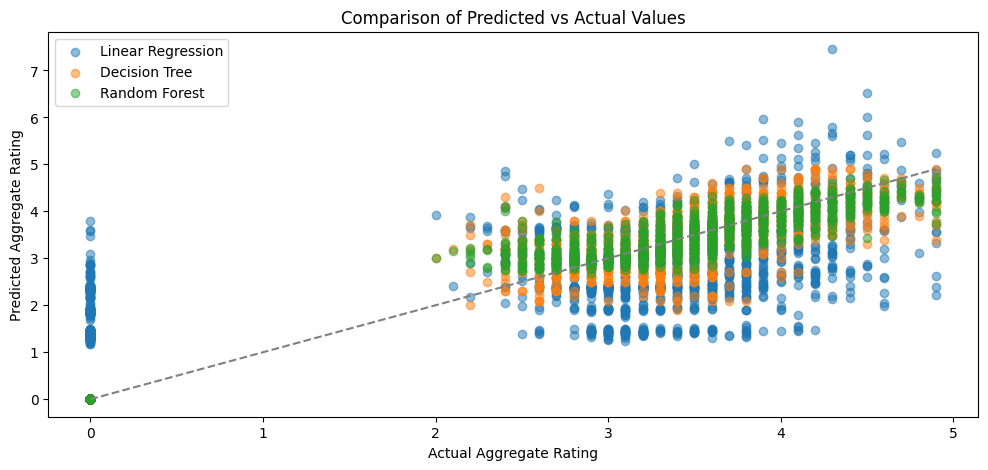

In [51]:
# visualizing the model performance
plt.figure(figsize=(12, 5))

# Scatter plot for Linear Regression
plt.scatter(y_test, yprediction[0], label='Linear Regression', alpha=0.5)

# Scatter plot for Decision Tree
plt.scatter(y_test, yprediction[1], label='Decision Tree', alpha=0.5)

# Scatter plot for Random Forest
plt.scatter(y_test, yprediction[2], label='Random Forest', alpha=0.5)

# Plotting the diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')

plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Comparison of Predicted vs Actual Values')
plt.legend()
plt.show()

## **Task 2: Customer Preference Analysis**

**1.** `Analyze the relationship between the type of cuisine and the restaurant's rating.`

**2.** `Identify the most popular cuisines among customers based on the number of votes.`

**3.** `Determine if there are any specific cuisines that tend to receive higher ratings.`

###**3.2.1. Analyze the relationship between the type of cuisine and the restaurant's rating.**

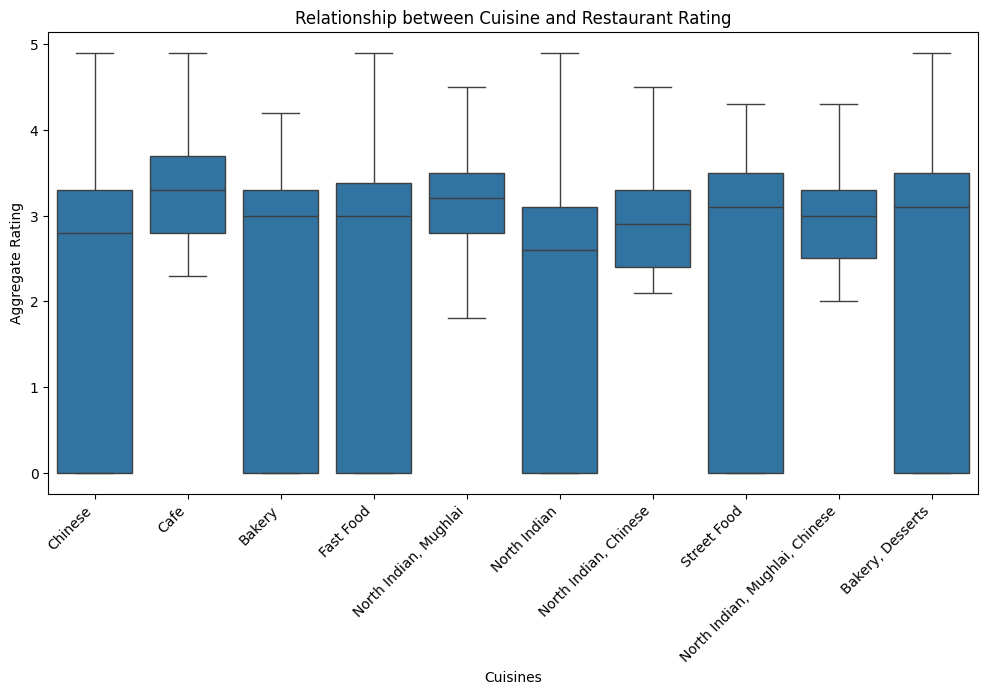

In [52]:
# analyzing the relationship between the type of cuisine and the restaurant's rating.

# top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10).index

# filtering the DataFrame for the top 10 cuisines
df_subset = df[df['Cuisines'].isin(top_cuisines)]
plt.figure(figsize=(12, 6))
plt.title('Relationship between Cuisine and Restaurant Rating')
plt.ylabel('Aggregate Rating')
plt.xlabel('Cuisines')
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_subset, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.show()

###**3.2.2.  Identify the most popular cuisines among customers based on the number of votes.**

Top 10 Cuisines Based on Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


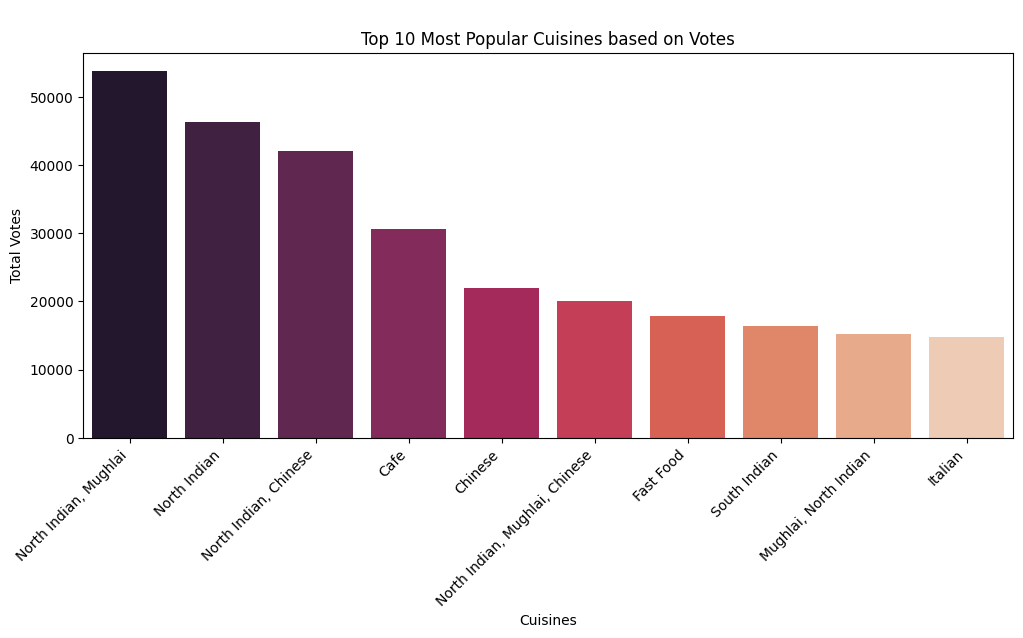

In [75]:
# Identifying the most popular cuisines based on the number of votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("Top 10 Cuisines Based on Votes:")
print(popular_cuisines)

# visualization
plt.figure(figsize=(12, 5))
sns.barplot(x=popular_cuisines.index, y=popular_cuisines.values, hue=popular_cuisines.index, legend=False, palette='rocket')
plt.title('\nTop 10 Most Popular Cuisines based on Votes')
plt.xlabel('Cuisines')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.show()

###**3.2.3. Determine if there are any specific cuisines that tend to receive higher ratings.**

Top 10 Cuisines with Highest Mean Ratings:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


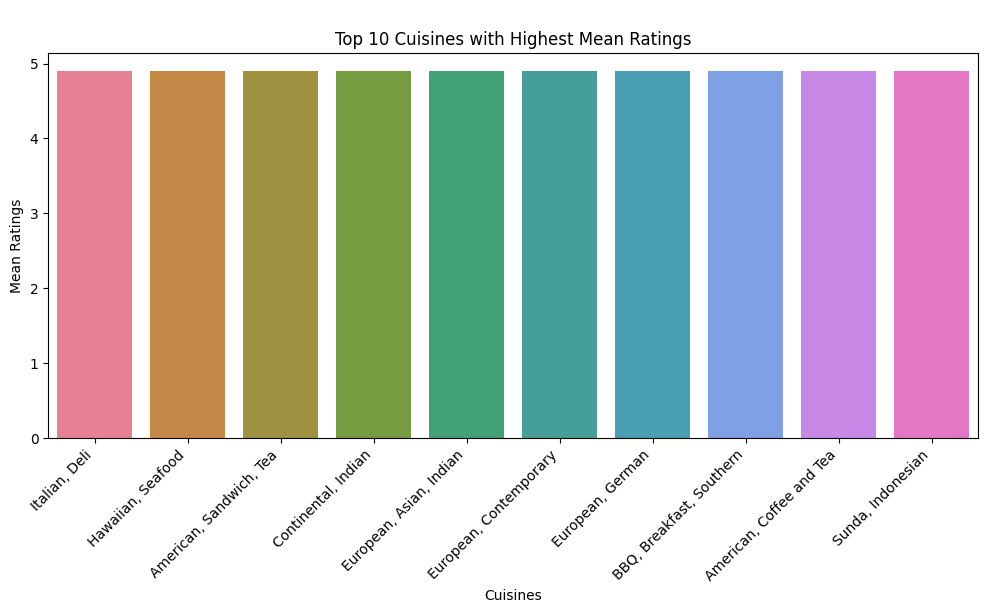

In [77]:
# determining the cuisine that tend to higher rating
top_cuisines_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Cuisines with Highest Mean Ratings:")
print(top_cuisines_ratings)

# Visualization
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cuisines_ratings.index, y=top_cuisines_ratings.values, hue=top_cuisines_ratings.index, legend=False, palette='husl')
plt.title('\nTop 10 Cuisines with Highest Mean Ratings')
plt.xlabel('Cuisines')
plt.ylabel('Mean Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Task 3: Data Visualization**

**1.** `Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).`

**2.** `Compare the average ratings of different cuisines or cities using appropriate visualizations.`

**3.** `Visualize the relationship between various features and the target variable to gain insights.`

###**3.3.1. Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).**

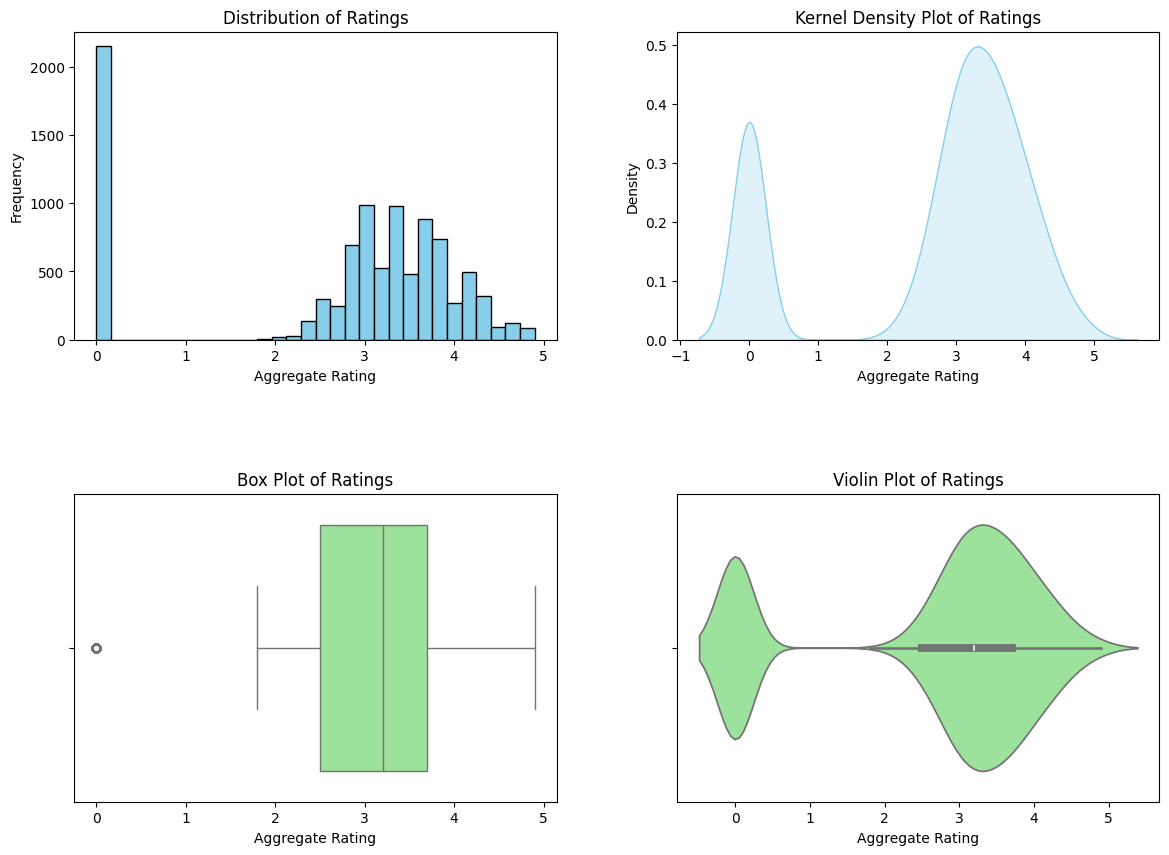

In [55]:
# creating visualizations to represent the distribution of ratings using different charts.
plt.figure(figsize=(14, 10))

# subplot 1: Histogram
plt.subplot(2, 2, 1)
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

# subplot 2: Kernel Density Plot
plt.subplot(2, 2, 2)
sns.kdeplot(df['Aggregate rating'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')

# Subplot 3: Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Aggregate rating'], color='lightgreen')
plt.title('Box Plot of Ratings')
plt.xlabel('Aggregate Rating')

# Subplot 4: Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(x=df['Aggregate rating'], color='lightgreen')
plt.title('Violin Plot of Ratings')
plt.xlabel('Aggregate Rating')

# Adjust both vertical and horizontal spacing
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()

* **Se**lecting these plots ensures a clear understanding of the **rating distribution-**

>**histograms** and **kernel density plots** show overall patterns, **box plots** offer summary statistics, and **violin plots** combine both, providing a complete picture for analysis.

###**3.3.2. Compare the average ratings of different cuisines or cities using appropriate visualizations.**

Average ratings of different Cuisines:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64



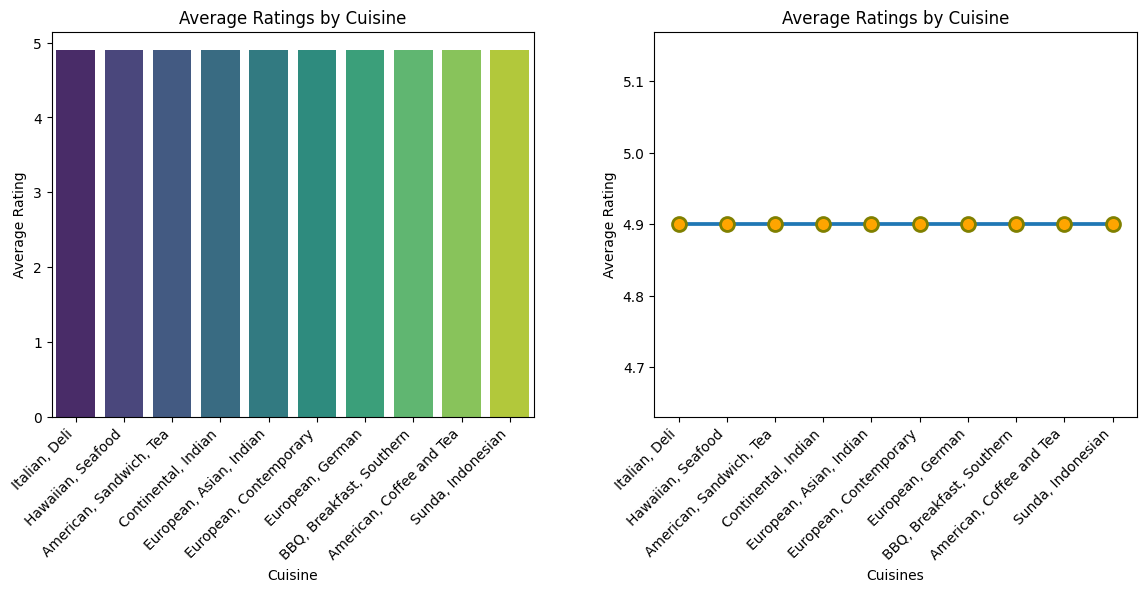

In [78]:
# comparing the average ratings of different cuisines using appropriate visualizations.
average_ratings_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print(f"Average ratings of different Cuisines:\n{average_ratings_by_cuisine}\n")

# visualization
plt.figure(figsize=(14, 5))

# Average Ratings by Cuisine (bar plot)
plt.subplot(1, 2, 1)
sns.barplot(x=average_ratings_by_cuisine.index, y=average_ratings_by_cuisine.values, palette='viridis', legend=False, hue=average_ratings_by_cuisine.index)
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

# Average Ratings by Cuisine (point plot)
plt.subplot(1, 2, 2)
sns.pointplot(x=average_ratings_by_cuisine.index, y=average_ratings_by_cuisine.values, markers='o', linestyles='-', mfc='orange', mec='olive', ms=10)
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(wspace=0.25)
plt.show()

Average ratings of different Cities:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64



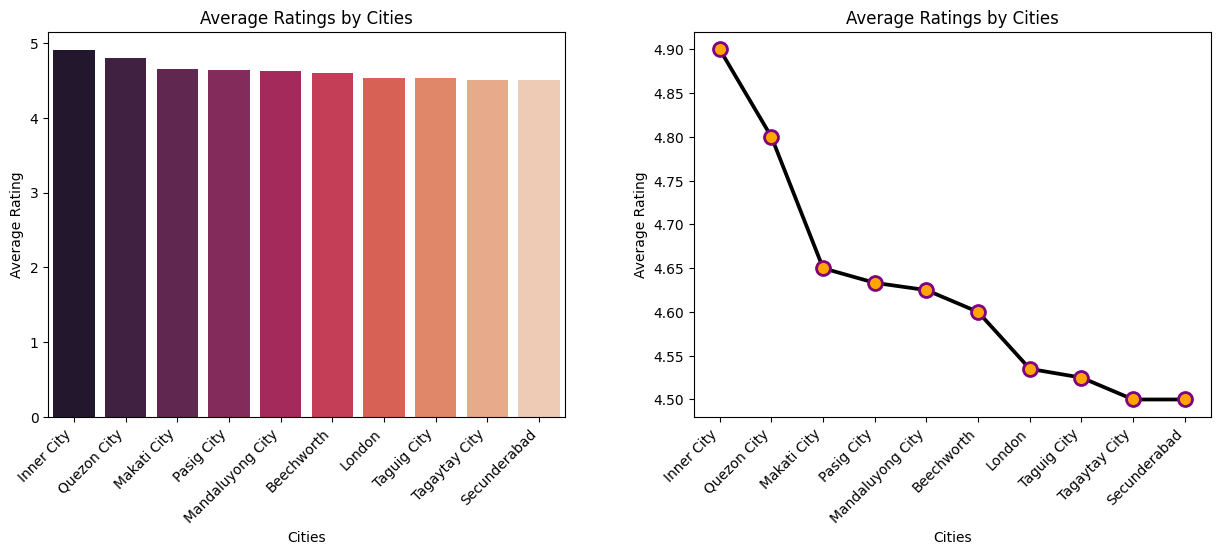

In [79]:
# comparing the average ratings of different cities using appropriate visualizations.
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print(f"Average ratings of different Cities:\n{avg_ratings_by_city}\n")

# visualization
plt.figure(figsize=(15, 5))

# Average Ratings by Cities (bar plot)
plt.subplot(1, 2, 1)
sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values, palette='rocket', legend=False, hue=avg_ratings_by_city.index)
plt.title('Average Ratings by Cities')
plt.xlabel('Cities')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

# Average Ratings by Cities (point plot)
plt.subplot(1, 2, 2)
sns.pointplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values, markers='o', color='k', linestyles='-', mfc='orange', mec='purple', ms=10)
plt.title('Average Ratings by Cities')
plt.xlabel('Cities')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(wspace=0.25)
plt.show()

###**3.3.3. Visualize the relationship between various features and the target variable to gain insights.**

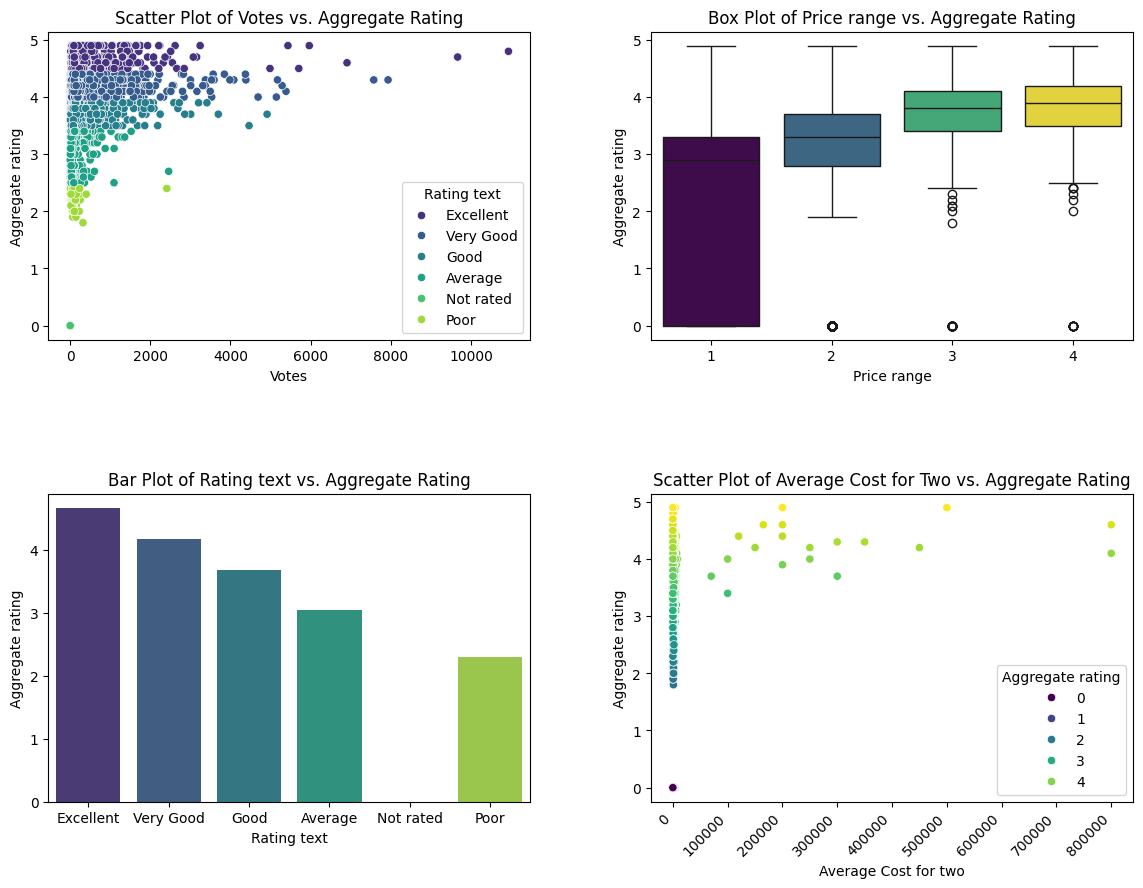

In [81]:
# Visualizing the relationship between various features and the target variable to gain insights.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Scatter plot of Average Cost for Two vs. Aggregate Rating
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, ax=axs[0, 0], hue='Rating text', palette='viridis')
axs[0, 0].set_title('Scatter Plot of Votes vs. Aggregate Rating')

# Boxplot of Price Range vs. Aggregate Rating
sns.boxplot(x='Price range', y='Aggregate rating', data=df, ax=axs[0, 1], palette='viridis', hue='Price range', legend=False)
axs[0, 1].set_title('Box Plot of Price range vs. Aggregate Rating')

# Bar Plot of Rating text vs. Aggregate rating
sns.barplot(x='Rating text', y='Aggregate rating', data=df, ax=axs[1, 0], errorbar=None, palette='viridis', hue='Rating text', legend=False)
axs[1, 0].set_title('Bar Plot of Rating text vs. Aggregate Rating')

# Scatter Plot of Average Cost for two vs. Aggregate rating
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, ax=axs[1, 1], hue='Aggregate rating', palette='viridis')
axs[1, 1].set_title('Scatter Plot of Average Cost for Two vs. Aggregate Rating')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()

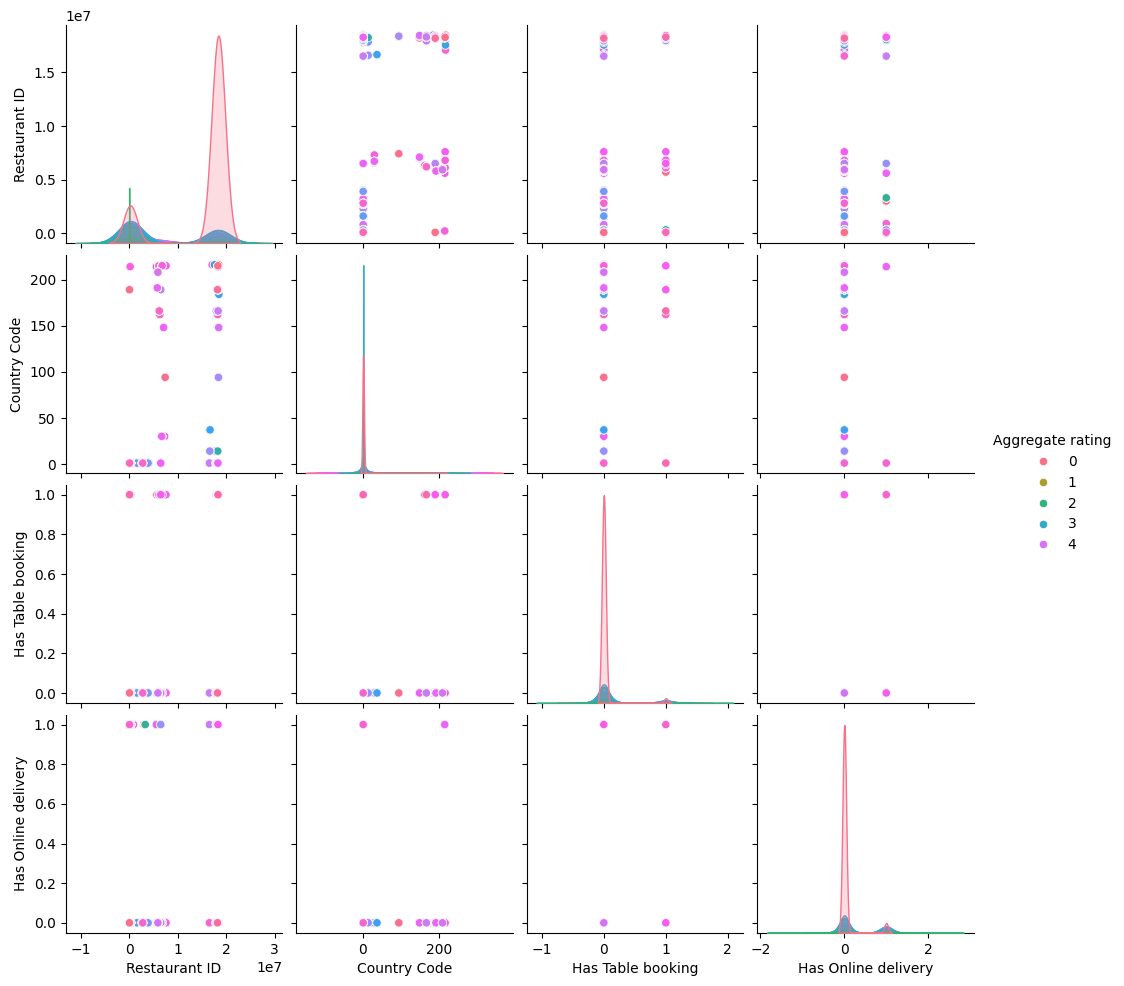

In [82]:
# remaining features vs. Aggregate rating

new_df = df[['Restaurant ID', 'Country Code', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Aggregate rating']]
sns.pairplot(new_df, hue='Aggregate rating', palette='husl')
plt.show()

#**Project Done!**